<a href="https://colab.research.google.com/github/Rubyy007/Assignment/blob/main/ibmdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np


In [3]:
data =pd.read_csv("/content/drive/My Drive/Colab Notebooks/Restaurant_Reviews.tsv",delimiter="\t",quoting=3)

In [4]:
data.shape
(1000,2)

(1000, 2)

In [5]:
from pandas.core.internals.base import Index
data.columns

Index(['Review','Liked'],dtype="object")

Index(['Review', 'Liked'], dtype='object')

In [6]:

data.tail(7)

,Review,Liked
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
data.head(5)


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [9]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import StemmerI

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
from nltk.stem import porter
from nltk.stem import PorterStemmer
corpus = []
for i in range(1000):
  review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
  review = review.lower()

  review_words=review.split()

  review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  review=[ps.stem(word) for word in review_words]
  review= ' '.join(review)
  corpus.append(review)


In [11]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [39]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y=data.iloc[:, 1].values


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size = 0.20,random_state = 0)

In [41]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [43]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [45]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
A1 = accuracy_score(y_test,y_pred)
A2 = precision_score(y_test,y_pred)
A3= recall_score(y_test,y_pred)



print("score is")
print("accuracy score is : {}%".format(round(A1*100,2)))
print("precision score is : {}%".format(round(A2*100,2)))
print("recall score is : {}%".format(round(A3*100,2)))

score is
accuracy score is : 76.5%
precision score is : 76.42%
recall score is : 78.64%


In [56]:
from sklearn.metrics import confusion_matrix
mj = confusion_matrix(y_test,y_pred)

In [57]:
mj

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'actual values')

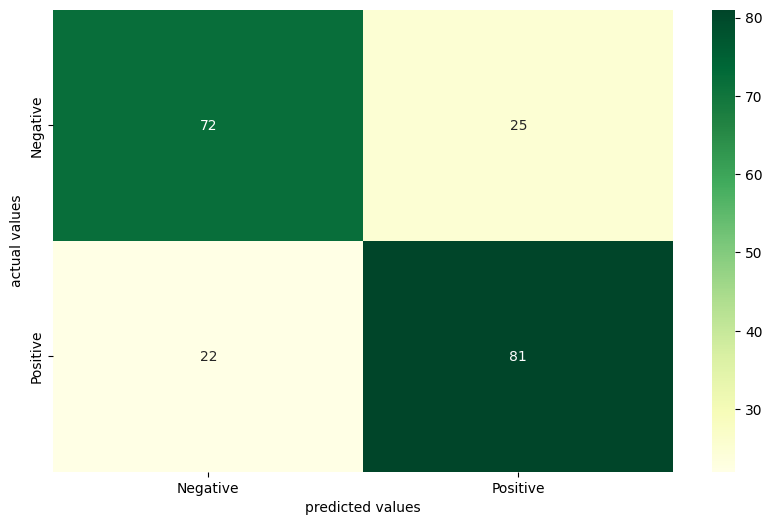

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(mj, annot=True , cmap="YlGn",xticklabels=["Negative", "Positive"] , yticklabels=["Negative", "Positive"] )
plt.xlabel("predicted values")
plt.ylabel("actual values")


In [118]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  a = accuracy_score(y_test,temp_y_pred)
  print("accuracy score for the alpha={} is : {}%".format(round(i,1),round(a*100,2)))
  if (a > best_accuracy):
    best_accuracy = a
    alpha_val = i
print("_________________________________________________________________________________")
print("the best accuracy is {}% with the alpha value as {}".format(round(best_accuracy*100, 2),round(alpha_val,1)))


accuracy score for the alpha=0.1 is : 78.0%
accuracy score for the alpha=0.2 is : 78.5%
accuracy score for the alpha=0.3 is : 78.0%
accuracy score for the alpha=0.4 is : 78.0%
accuracy score for the alpha=0.5 is : 77.5%
accuracy score for the alpha=0.6 is : 77.5%
accuracy score for the alpha=0.7 is : 77.5%
accuracy score for the alpha=0.8 is : 77.0%
accuracy score for the alpha=0.9 is : 76.5%
accuracy score for the alpha=1.0 is : 76.5%
_________________________________________________________________________________
the best accuracy is 78.5% with the alpha value as 0.2


In [119]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [136]:

def ps(sr):
  sr = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sr)

  sr = sr.lower()
  sr_words = sr.split()
  sr_words = [word for word in sr_words if not word in set(stopwords.words('english'))]
  ps1 = PorterStemmer()
  fr = [ps1.stem(word) for word in sr_words]
  fr = ' '.join(fr)

  temp = cv.transform([fr]).toarray()
  return classifier.predict(temp)

In [138]:
sr = "the food is really bad."
if ps(sr):
  print("this is positive review ....")
else:
  print("this is NEGATIVE review..........")

this is NEGATIVE review..........


In [145]:
sr = "the food is tasty."
if ps(sr):
  print("this is POSITIVE review ....")
else:
  print("this is NEGATIVE review..........")


this is POSITIVE review ....


In [147]:
sr = "the food is fine."
if ps(sr):
  print("this is POSITIVE review ....")
else:
  print("this is NEGATIVE review..........")

this is POSITIVE review ....


In [148]:
sr = "awesome wonderfull good place."
if ps(sr):
  print("this is POSITIVE review ....")
else:
  print("this is NEGATIVE review..........")

this is POSITIVE review ....
